In [1]:
from kunal import *

In [3]:
# MNIST dataset is built into keras
from tensorflow.keras.datasets import mnist

In [4]:
# already organized as xtrain, ytrain, xtest , ytes
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtrain[0].shape

(28, 28)

In [7]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

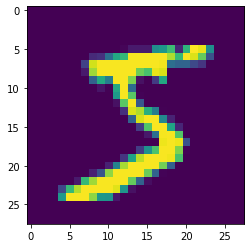

In [8]:
# to convert two dimensional array object into an image we can make use of plt.imshow()

plt.imshow(xtrain[0])

In [9]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# the labels are number they represent keeping the labels in the same format results in network, assuming that 
# these labels are some sort of continuous variables
# to avoid that scenario we can make use of one hot encoding it is essentially converting the output into a
# continuous arrays of 0,1.
# the length of the array will be same as the class variables.
# the position of the correct label will be marked as 1 in the array and all other positions will be filled
# by zeros.

In [11]:
# The usual thing to do in a classification problem is to use one hot encoding to change the format of the
# labels

## One hot encoding using Keras

In [12]:
from tensorflow.keras.utils import to_categorical 

In [13]:
ytrain.shape

(60000,)

In [14]:
# this shape of 60000 should be converted into 2d matrix of (60000,10)

In [15]:
y_example = to_categorical(ytrain)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
# converting ytrain and ytest values
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

### Normalizing the dataset values

In [20]:
xtrain[0].max()

255

In [21]:
# we can make use MinMaxScaler for the purpose.
# We can simply divide the xtrain, xtest by the maximum value 

In [22]:
xtrain = xtrain/255
xtest = xtest/255

In [23]:
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

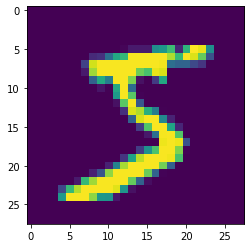

In [24]:
plt.imshow(xtrain[0])

In [25]:
xtrain.shape

(60000, 28, 28)

In [26]:
# To make the CNN understand that we are dealing with the greyscale image, we need to add one more dimension
# which has value 1, indicating that it is a grey scale image

# batch size,width,height,color channels
xtrain = xtrain.reshape(60000,28,28,1)

In [27]:
xtest = xtest.reshape(10000,28,28,1)

## Creating the Model


In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [32]:
# Dense layer is used to create the feed forward network
# Conv2D layer is the dedicated convolutional neural network 
# Maxpool2D is the layer used to pool the network to reduce the number of parameters using maxpooling technique
# Flatten is used to flatten out the outputs so they are suitable to feed into the Dense layer

In [34]:
model = Sequential()
# usually filters value for Conv2D is given in the powers of 2.
model.add(Conv2D(filters = 32,kernel_size=(4,4),strides=(1,1),padding="valid",
                input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# OUTPUT Layer
# activation function is softmax because this is a multi class classification problem.
model.add(Dense(10,activation='softmax'))
# loss --> categorical_crossentropy because this is a multi class classification problem.
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])





### Conv2D layer
##### Arguments
  * filters: Integer, the dimensionality of the output space
    (i.e. the number of output filters in the convolution).
  * kernel_size: An integer or tuple/list of 2 integers, specifying the
    height and width of the 2D convolution window.
    Can be a single integer to specify the same value for
    all spatial dimensions.
  * strides: An integer or tuple/list of 2 integers,
    specifying the strides of the convolution along the height and width.
    Can be a single integer to specify the same value for
    all spatial dimensions.
  * padding: one of `"valid"` or `"same"` (case-insensitive).

In [35]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard


In [36]:
early_stop = EarlyStopping(monitor="val_loss",patience=5,mode='min')


In [37]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20,
         callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 54s 895us/sample - loss: 0.1512 - accuracy: 0.9545 - val_loss: 0.0631 - val_accuracy: 0.9791
Epoch 2/20
60000/60000 [==============================] - 42s 694us/sample - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0460 - val_accuracy: 0.9849
Epoch 3/20
60000/60000 [==============================] - 40s 668us/sample - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0391 - val_accuracy: 0.9867
Epoch 4/20
60000/60000 [==============================] - 46s 768us/sample - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0358 - val_accuracy: 0.9883
Epoch 5/20
60000/60000 [==============================] - 38s 639us/sample - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0418 - val_accuracy: 0.9878
Epoch 6/20
60000/60000 [==============================] - 39s 647us/sample - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0559 - val_accuracy: 0.9849
Epoch 7/20
60000/60000 [====================

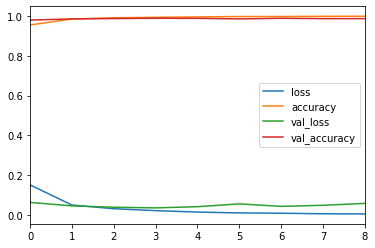

In [38]:
pd.DataFrame(model.history.history).plot()

In [40]:
model.evaluate(xtest,ytest,verbose=0)

[0.05836023720698413, 0.9863]

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
ytest

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
yexam = []
for i in ytest:
    yexam.append(np.argmax(i))

In [49]:
predictions = model.predict_classes(xtest)

In [50]:
print(classification_report(yexam,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [52]:
print(confusion_matrix(yexam,predictions))

[[ 970    0    2    1    0    1    4    0    1    1]
 [   0 1125    2    2    0    1    2    1    2    0]
 [   0    0 1020    3    2    0    1    5    1    0]
 [   0    0    0 1006    0    1    0    2    1    0]
 [   0    0    0    0  973    0    2    0    0    7]
 [   0    0    0   13    0  877    1    0    1    0]
 [   2    2    0    0    1    1  949    0    3    0]
 [   0    0    9    2    1    0    0 1010    1    5]
 [   2    0    2    6    0    2    0    4  958    0]
 [   0    1    0   12    6    5    1    7    2  975]]


In [53]:
# visualizing confusion matrix

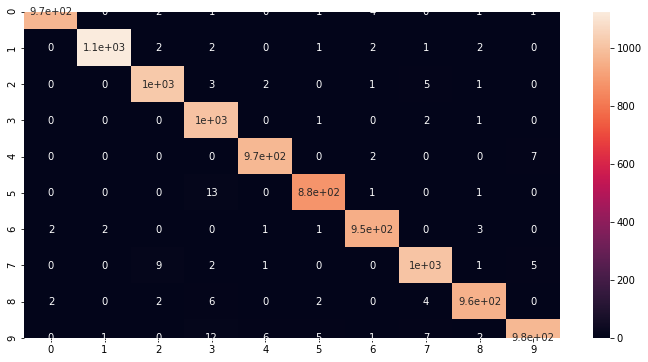

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(yexam,predictions),annot=True)

In [57]:
my_new_image = xtrain[0]

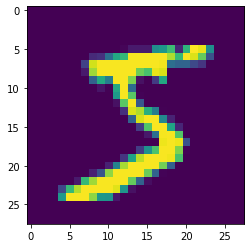

In [71]:
plt.imshow(my_new_image.reshape(28,28))

In [76]:
# To change the shape of the data so that the model can understand the type of the data
# (num_images,width,height,color_channels)
model.predict_classes(my_new_image.reshape(1,28,28,1))

array([5], dtype=int64)